<a href="https://www.kaggle.com/code/fariskarim/salary-w-feature-engineering-multiple-models?scriptVersionId=139364161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv


In [2]:
salary_data = pd.read_csv('/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv')

In [3]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
salary_data_cleaned = salary_data.dropna()

salary_data_cleaned.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [6]:
salary_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


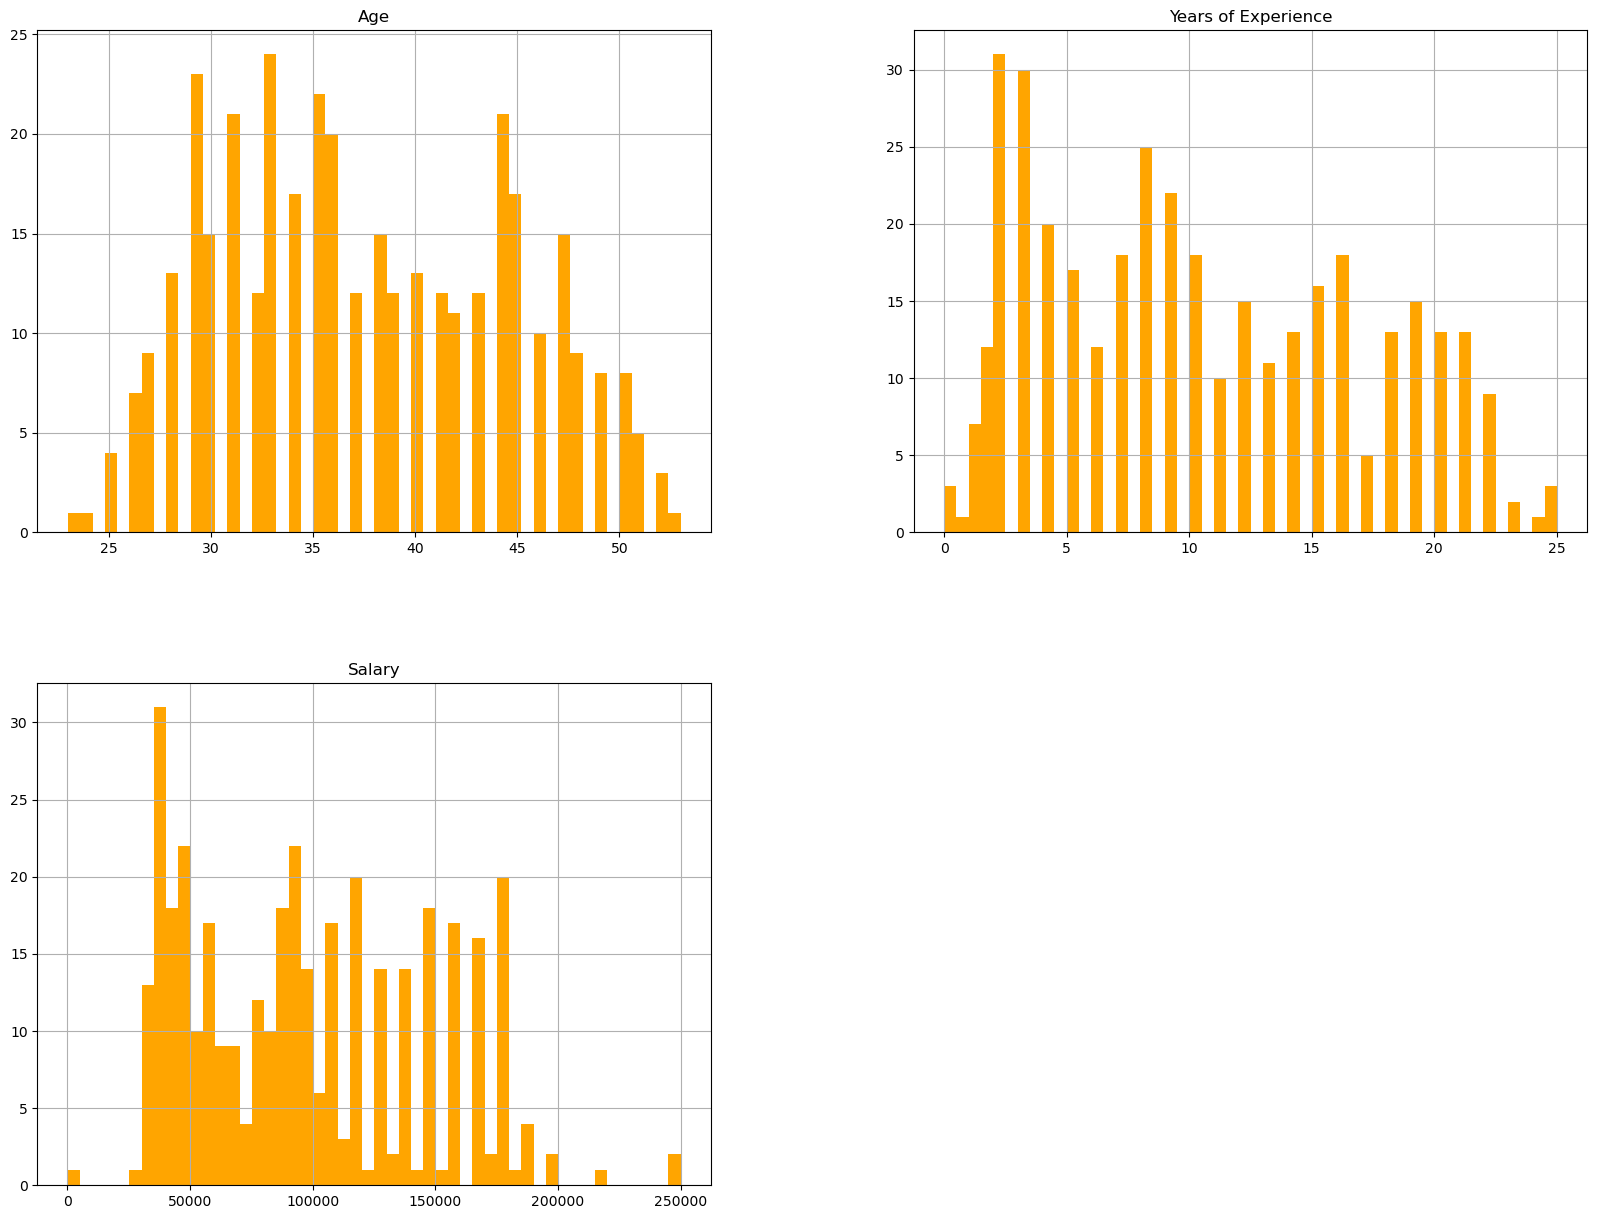

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
salary_data.hist(bins=50, figsize=(20,15), color = 'orange')
plt.show()

In [8]:
corr_matrix = salary_data.corr()

/tmp/ipykernel_20/2345637380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = salary_data.corr()


In [9]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary                 1.000000
Years of Experience    0.930338
Age                    0.922335
Name: Salary, dtype: float64

In [10]:
salary_data_cleaned['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

salary_data_cleaned['EncodedEducation'] = label_encoder.fit_transform(salary_data_cleaned['Education Level'])


salary_data_cleaned.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/853381263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data_cleaned['EncodedEducation'] = label_encoder.fit_transform(salary_data_cleaned['Education Level'])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,EncodedEducation
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1


In [12]:
salary_data_cleaned['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [13]:
salary_data_cleaned['Senior_or_Director'] = salary_data_cleaned['Job Title'].apply(lambda title: 1 if 'Senior' in title or 'VP' in title or 'Engineer' in title
                                                                                   else 2 if 'CEO' in title or 'Director' in title else 0)

/tmp/ipykernel_20/3636454573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data_cleaned['Senior_or_Director'] = salary_data_cleaned['Job Title'].apply(lambda title: 1 if 'Senior' in title or 'VP' in title or 'Engineer' in title


In [14]:
salary_data_cleaned.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,EncodedEducation,Senior_or_Director
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,2


In [15]:
salary_data_cleaned = pd.get_dummies(salary_data_cleaned, columns=['Gender'])

In [16]:
salary_data_cleaned.head()

,Age,Education Level,Job Title,Years of Experience,Salary,EncodedEducation,Senior_or_Director,Gender_Female,Gender_Male
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0,1,0,1
1,28.0,Master's,Data Analyst,3.0,65000.0,1,0,1,0
2,45.0,PhD,Senior Manager,15.0,150000.0,2,1,0,1
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,0,0,1,0
4,52.0,Master's,Director,20.0,200000.0,1,2,0,1


In [17]:
corr_matrix = salary_data_cleaned.corr()

/tmp/ipykernel_20/358347868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = salary_data_cleaned.corr()


In [18]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary                 1.000000
Years of Experience    0.930338
Age                    0.922335
Senior_or_Director     0.778798
EncodedEducation       0.670371
Gender_Male            0.071106
Gender_Female         -0.071106
Name: Salary, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split


X = salary_data_cleaned[['Years of Experience','Age','EncodedEducation','Senior_or_Director','Gender_Male','Gender_Female']]
y = salary_data_cleaned['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (298, 6)
X_test shape: (75, 6)
y_train shape: (298,)
y_test shape: (75,)


### Linear Regression

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

mse_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE scores
rmse_scores = np.sqrt(-mse_scores)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())

RMSE scores for each fold: [14150.77345374  9117.4332891  15234.08824643 16561.05564613
 11851.416361  ]
Mean RMSE score: 13382.953399279115


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

n_estimators_values = [10, 50, 200, 250, 300, 400, 500]

best_rmse = float('inf') 
best_n_estimators = None

for n_estimators in n_estimators_values:

    model = RandomForestRegressor(n_estimators=n_estimators)
    
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    

    mean_rmse = rmse_scores.mean()
    
    print(f"Number of estimators: {n_estimators}, Mean RMSE: {mean_rmse}")
    
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_n_estimators = n_estimators

print("Best RMSE:", best_rmse)
print("Best number of estimators:", best_n_estimators)






Number of estimators: 10, Mean RMSE: 13928.934851092941
Number of estimators: 50, Mean RMSE: 13934.613233688058
Number of estimators: 200, Mean RMSE: 13641.522763518948
Number of estimators: 250, Mean RMSE: 13745.18007216101
Number of estimators: 300, Mean RMSE: 13662.457835898658
Number of estimators: 400, Mean RMSE: 13699.1842422321
Number of estimators: 500, Mean RMSE: 13678.911858335536
Best RMSE: 13641.522763518948
Best number of estimators: 200


### Lasso

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]

best_rmse = float('inf')  
best_alpha = None

for alpha in alpha_values:
    print(f"Alpha: {alpha}")
    
    model = Lasso(alpha=alpha)
    
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
    mean_rmse = rmse_scores.mean()
    
    print("Cross-validation RMSE scores:", rmse_scores)
    print("Mean RMSE:", mean_rmse)

    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_alpha = alpha

print("Best RMSE:", best_rmse)
print("Best alpha:", best_alpha)


Alpha: 0.01
Cross-validation RMSE scores: [14150.77345431  9117.43543958 15234.07710274 16561.05783981
 11851.42766206]
Mean RMSE: 13382.954299700743
Alpha: 0.1
Cross-validation RMSE scores: [14150.77396537  9117.45481582 15233.9757777  16561.07756174
 11851.52951731]
Mean RMSE: 13382.962327586905
Alpha: 1.0
Cross-validation RMSE scores: [14150.77774301  9117.64944378 15232.97188818 16561.27865336
 11852.5500806 ]
Mean RMSE: 13383.045561787096
Alpha: 10.0
Cross-validation RMSE scores: [14150.85036121  9119.63128924 15223.05628472 16563.30995943
 11862.84477817]
Mean RMSE: 13383.938534554294
Alpha: 100.0
Cross-validation RMSE scores: [14144.61354733  9138.44862473 15157.98356756 16592.75004048
 11934.20976342]
Mean RMSE: 13393.601108702822
Best RMSE: 13382.954299700743
Best alpha: 0.01


### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error

learning_rates = [0.01, 0.1, 0.2]
n_estimators_values = [50, 100, 150]

best_rmse = float('inf')  
best_learning_rate = None
best_n_estimators = None

for learning_rate in learning_rates:
    for n_estimators in n_estimators_values:
        print(f"Learning Rate: {learning_rate}, Number of Estimators: {n_estimators}")
        
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators)
        
        rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
        
        mean_rmse = rmse_scores.mean()
        
        print("Cross-validation RMSE scores:", rmse_scores)
        print("Mean RMSE:", mean_rmse)
        
        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_learning_rate = learning_rate
            best_n_estimators = n_estimators

print("Best RMSE:", best_rmse)
print("Best learning rate:", best_learning_rate)
print("Best number of estimators:", best_n_estimators)


Learning Rate: 0.01, Number of Estimators: 50
Cross-validation RMSE scores: [29227.5132696  30095.11018761 34955.6755258  35908.19868315
 29427.34277485]
Mean RMSE: 31922.768088201195
Learning Rate: 0.01, Number of Estimators: 100
Cross-validation RMSE scores: [21186.15739781 20250.58534178 25958.49727488 27051.57482661
 19966.30339413]
Mean RMSE: 22882.623647040637
Learning Rate: 0.01, Number of Estimators: 150
Cross-validation RMSE scores: [17394.78497315 15085.42347938 21065.65364316 21718.88213378
 14756.76415396]
Mean RMSE: 18004.301676684987
Learning Rate: 0.1, Number of Estimators: 50
Cross-validation RMSE scores: [14058.81034088 12414.45827068 15089.79410491 14991.90606891
 10988.84143615]
Mean RMSE: 13508.762044305116
Learning Rate: 0.1, Number of Estimators: 100
Cross-validation RMSE scores: [13868.72294483 12799.78291616 15353.33457436 14406.66900424
 10931.76603755]
Mean RMSE: 13472.055095430294
Learning Rate: 0.1, Number of Estimators: 150
Cross-validation RMSE scores: [13

### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
best_rmse = float('inf')
best_alpha = None

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    mean_rmse = rmse_scores.mean()
    print("Alpha:", alpha)
    print("Cross-validation RMSE scores:", rmse_scores)
    print("Mean RMSE:", mean_rmse)
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_alpha = alpha

print("Best RMSE:", best_rmse)
print("Best alpha:", best_alpha)


Alpha: 0.01
Cross-validation RMSE scores: [14150.49890421  9117.69897687 15233.49504334 16561.23462566
 11851.90740063]
Mean RMSE: 13382.96699014143
Alpha: 0.1
Cross-validation RMSE scores: [14148.04038323  9120.10265825 15228.17966528 16562.84805323
 11856.33348688]
Mean RMSE: 13383.100849375556
Alpha: 1.0
Cross-validation RMSE scores: [14124.65602433  9145.32429265 15177.28596547 16579.22957548
 11901.22019939]
Mean RMSE: 13385.543211464003
Alpha: 10.0
Cross-validation RMSE scores: [13986.54867043  9475.63226238 14844.65596418 16758.89803907
 12382.3442721 ]
Mean RMSE: 13489.615841631155
Alpha: 100.0
Cross-validation RMSE scores: [14669.60548522 12268.057945   15287.57505134 18200.01102626
 15448.95286145]
Mean RMSE: 15174.840473855453
Best RMSE: 13382.96699014143
Best alpha: 0.01


#### Using LinearRegression gives us the lowest RMSE. Now we perform a final prediction using all of the data.

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:     ", rmse)

RMSE:      13826.923738845413
